In [37]:
%matplotlib notebook

import matplotlib as mpl
mpl.get_backend()

'nbAgg'

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
#download files for DataSet 
#Weather
path_data_weather = 'https://raw.githubusercontent.com/RodionNik/DataSet/master/USC00200230.csv'
dw = pd.read_csv(path_data_weather,low_memory=False) 

#solar activity
path_data_solar = 'https://raw.githubusercontent.com/RodionNik/DataSet/master/historical_tsi.csv'
ds = pd.read_csv(path_data_solar)

In [40]:
dw = dw.replace(-9999,0)

In [41]:
#drop unnecessary columns
for col in dw.columns:
    
    if 'MFLAG' == col[:5]:
        dw=dw.drop(columns=col)
    if 'QFLAG' == col[:5]:
        dw=dw.drop(columns=col)
    if 'SFLAG' == col[:5]:
        dw=dw.drop(columns=col) 
#    if 'VALUE' == col[:5]:
#        dw[col] = dw[col]*0.1

In [42]:
#create DataFrame
dt_max = dw[dw['ELEMENT']=='TMAX']
dt_min = dw[dw['ELEMENT']=='TMIN']
dtorn = dw[dw['ELEMENT']=='WT11']   #Tornado
thunder = dw[dw['ELEMENT']=='WT03'] #Thunder
hail = dw[dw['ELEMENT']=='WT04']    #Hail

In [43]:
#DataFrame MIN & MAX
col_val = [i for i in range(4,35)]

dt_min['MIN'] = np.mean(dt_min.iloc[:,col_val]*0.1 ,axis=1)
dt_min['DM']  = dt_min.YEAR.astype(str).str.cat(dt_min.MONTH.astype(str), sep='/') 

dt_max['MAX'] = np.mean(dt_max.iloc[:,col_val]*0.1,axis=1)
dt_max['DM']  = dt_max.YEAR.astype(str).str.cat(dt_max.MONTH.astype(str), sep='/') 


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

In [44]:
#DataFrame high or damaging winds (Tornado)
#add column TORN general number of month
col_val = [i for i in range(4,35)]

dtorn['TORN'] = np.sum(dtorn.iloc[:,col_val],axis=1)  

#group by years, summ on general numbers
dtorn = dtorn.groupby('YEAR').agg({'TORN': np.sum})

#dtorn.reset_index()
#dtorn.set_index('YEAR').head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [45]:
#DataFrame Thunder 
#add columns THUNDER general number of month
col_val = [i for i in range(4,35)]
thunder['THUNDER'] = np.sum(thunder.iloc[:,col_val],axis=1)  

#добавление столбца 
thunder = thunder.groupby('YEAR').agg({'THUNDER': np.sum})


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [46]:
#DataFrame hail 
#add column HAIL general numbers
col_val = [i for i in range(4,35)]
hail['HAIL'] = np.sum(hail.iloc[:,col_val],axis=1)  
#add column DM = YEARS/MONTH 
hail['DM']  = hail.YEAR.astype(str).str.cat(hail.MONTH.astype(str), sep='/')

#group by years
#hail = hail.groupby('YEAR').agg({'HAIL': np.sum})

#hail.reset_index()
#hail.set_index('YEAR').head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# DataFrame Solar Activity

In [47]:
ds.columns

Index(['time (yyyy)', 'Irradiance (W/m^2)'], dtype='object')

In [48]:
ds = ds.rename(columns={'time (yyyy)':'DATE','Irradiance (W/m^2)':'ACTIV'})

In [49]:
#ds.reset_index()
#ds.set_index('DATE').head()

# GRAPH

In [50]:
#show period
yb = 1930
ye = 2018

<IPython.core.display.Javascript object>


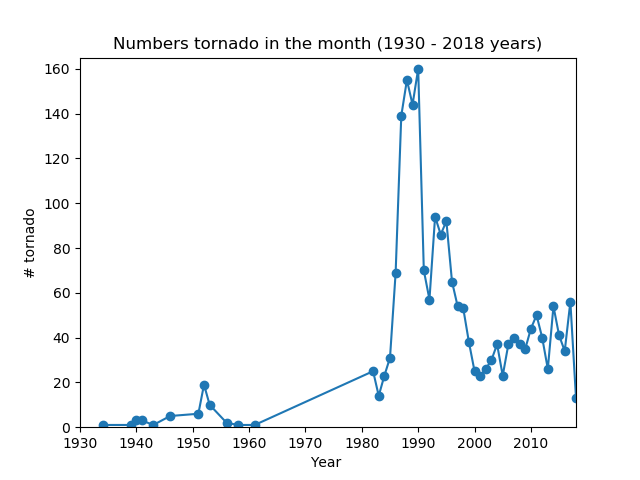

Text(0.5,0,'Year ')

In [51]:
#Tornado 
plt.figure()
ax = plt.gca()
ax.axis([yb,ye,0,165])
#plt.scatter(dtorn.index,dtorn,s=10)
plt.plot(dtorn,'-o')

plt.title('Numbers tornado in the month (1930 - 2018 years)')
plt.ylabel('# tornado')
plt.xlabel('Year ') 

<IPython.core.display.Javascript object>


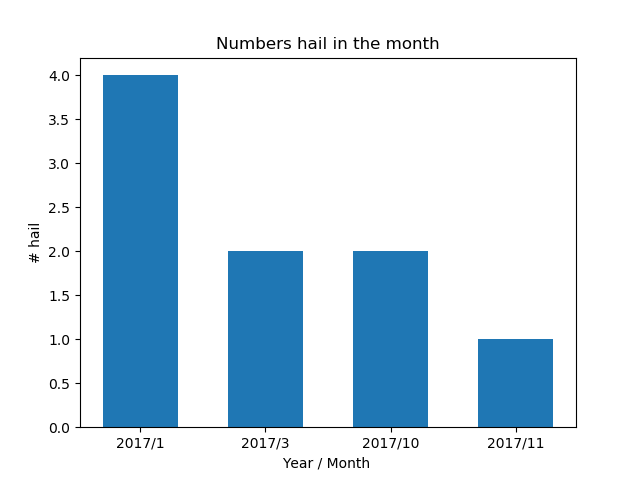

Text(0.5,0,'Year / Month ')

In [57]:
#hail
plt.figure()
ax = plt.gca()
#ax.axis([yb,ye,0,10])
#plt.scatter(dtorn.index,dtorn,s=10)
#plt.plot(hail['HAIL'],'-o')

xval = range(len(hail))
plt.bar(xval,hail['HAIL'],width=0.6)
plt.xticks(xval, hail['DM'])

plt.title('Numbers hail in the month')
plt.ylabel('# hail')
plt.xlabel('Year / Month ') 



<IPython.core.display.Javascript object>


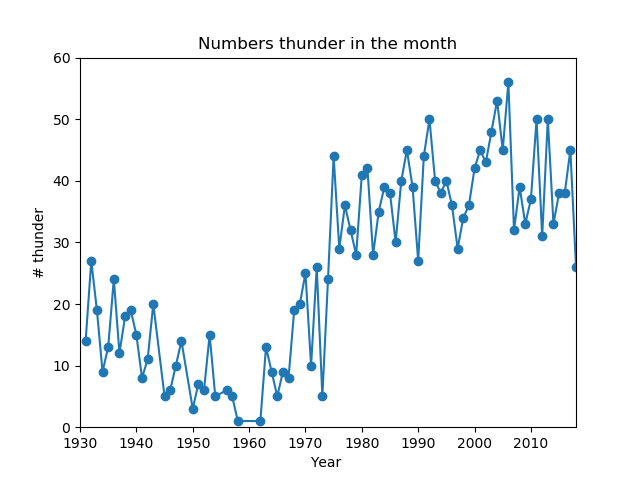

Text(0.5,0,'Year ')

In [52]:
#thunder
plt.figure()
ax = plt.gca()
ax.axis([yb,ye,0,60])
plt.plot(thunder,'-o')

plt.title('Numbers thunder in the month')
plt.ylabel('# thunder')
plt.xlabel('Year ')


# Solar activity

In [53]:
#scale value
ds['ACTIV'] = ds['ACTIV']-1360.75
#scale year
ds = ds.reset_index()
ds = ds.set_index('DATE')
ds = ds.loc[str(yb):]

In [60]:
#scale by dec
div = 10
ds_c = ds.copy()
ds_c['scale'] = ds_c.index/div
ds_c['scale'] = ds_c['scale'].astype(int)
ds_c = ds_c.groupby('scale').agg({'ACTIV': np.average})

# Versus Solar activity and High or damaging winds (Tornado)

<IPython.core.display.Javascript object>


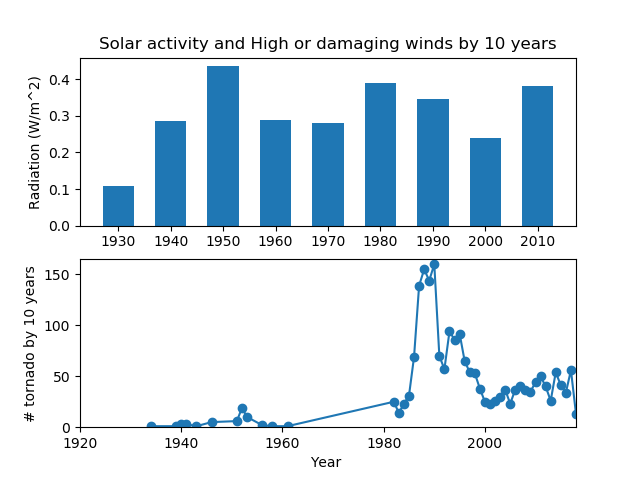

Text(0.5,0,'Year ')

In [55]:
plt.figure()

#Solar activity
plt.subplot(211)
xval = range(len(ds_c))
plt.bar(xval,ds_c['ACTIV'],width=0.6)
plt.xticks(xval, ds_c.index*div)
plt.ylabel('Radiation (W/m^2)')
plt.title('Solar activity and High or damaging winds by 10 years')


#tornado
plt.subplot(212)
ax = plt.gca()
ax.axis([yb-10,ye,0,165])
plt.plot(dtorn,'-o',label = 'tornado')
plt.ylabel('# tornado by 10 years')
#plt.legend(loc = 2, frameon = False)
plt.xlabel('Year ') 

# dependence of the hail of temperature

<IPython.core.display.Javascript object>


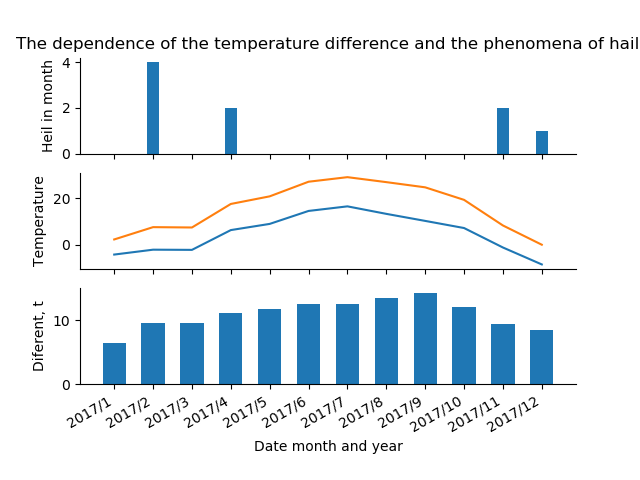

In [56]:
#plt.figure()
fig, ax = plt.subplots(3, 1, sharex=True)

#numbers hail
hail = hail.reset_index()
hail = hail.set_index('YEAR','MONTH')
hail = hail.loc[str(2017):str(2017)]
ax[0].bar(hail.MONTH,hail.HAIL,width=0.3)

#graf temperature
dt_min = dt_min.reset_index()
dt_min = dt_min.set_index('YEAR')
dt_min = dt_min.loc[str(2017):str(2017)]
dt_min = dt_min.reset_index()
dt_min = dt_min.set_index('YEAR','MONTH')

dt_max = dt_max.reset_index()
dt_max = dt_max.set_index('YEAR')
dt_max = dt_max.loc[str(2017):str(2017)]
dt_max = dt_max.reset_index()
dt_max = dt_max.set_index('YEAR','MONTH')

ax[1].plot(dt_min.DM,dt_min.MIN)
ax[1].plot(dt_max.DM,dt_max.MAX)
#ax1.xticks(dt_min.DM,rotation = '45')

#diagram diferenc
xval = range(len(dt_min))
ax[2].bar(xval,dt_max.MAX-dt_min.MIN, width=0.6)
#ax3.xticks(xval, dt_max.DM, rotation = '45' )
#ax3.ylabel('MAX - MIN')
#ax3.title('Diferent temperature')

ax[0].set_title('The dependence of the temperature difference and the phenomena of hail')
axs = plt.gca()
ax[0].spines['top'].set_visible(False) 
ax[0].spines['right'].set_visible(False)

ax[1].spines['top'].set_visible(False) 
ax[1].spines['right'].set_visible(False)

ax[2].spines['top'].set_visible(False) 
ax[2].spines['right'].set_visible(False)
ax[2].set(xlabel='Date month and year',ylabel = 'Diferent, t')
ax[2].set(xlabel='Date month and year')
ax[1].set(ylabel='Temperature')
ax[0].set(ylabel='Heil in month')

fig.autofmt_xdate()

In [ ]:
plt.figure()

#диаграмма разницы
plt.subplot(3,1,1)

xval = range(len(dt_min))
plt.bar(xval,dt_max.MAX-dt_min.MIN, width=0.6)
plt.xticks(xval, dt_max.DM, rotation = '45' )
plt.ylabel('MAX - MIN')
plt.title('Diferent temperature')

#график температур
plt.subplot(3,1,2)
dt_min = dt_min.reset_index()
dt_min = dt_min.set_index('YEAR')
dt_min = dt_min.loc[str(2017):str(2017)]
dt_min = dt_min.reset_index()
dt_min = dt_min.set_index('YEAR','MONTH')

plt.plot(dt_min.DM,dt_min.MIN)
dt_max = dt_max.reset_index()
dt_max = dt_max.set_index('YEAR')
dt_max = dt_max.loc[str(2017):str(2017)]
dt_max = dt_max.reset_index()
dt_max = dt_max.set_index('YEAR','MONTH')

plt.plot(dt_max.DM,dt_max.MAX)
plt.xticks(dt_min.DM,rotation = '45')


#количество града
plt.subplot(3,1,3)
hail = hail.reset_index()
hail = hail.set_index('YEAR','MONTH')
hail = hail.loc[:str(2017)]
plt.plot(hail.DM,hail.HAIL)